In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 3s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 1s 1us/step


In [6]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

In [7]:
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [8]:
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [17]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 36ms/step - loss: 0.5179 - accuracy: 0.7827 - val_loss: 0.3879 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 0s 17ms/step - loss: 0.3117 - accuracy: 0.9031 - val_loss: 0.3240 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2262 - accuracy: 0.9297 - val_loss: 0.3041 - val_accuracy: 0.8763
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1800 - accuracy: 0.9426 - val_loss: 0.2822 - val_accuracy: 0.8864
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1460 - accuracy: 0.9535 - val_loss: 0.2862 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1152 - accuracy: 0.9655 - val_loss: 0.2924 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0978 - accuracy: 0.9692 - val_loss: 0.3079 - val_accuracy: 0.8854
Epoch 8/20
30

In [19]:
history_dict = history.history

In [20]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
import matplotlib.pyplot as plt

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

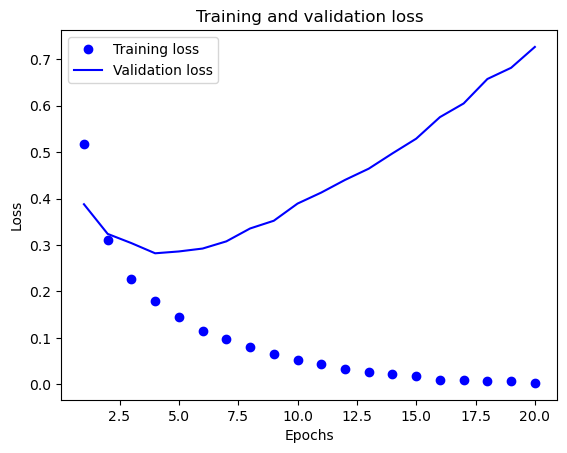

In [23]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

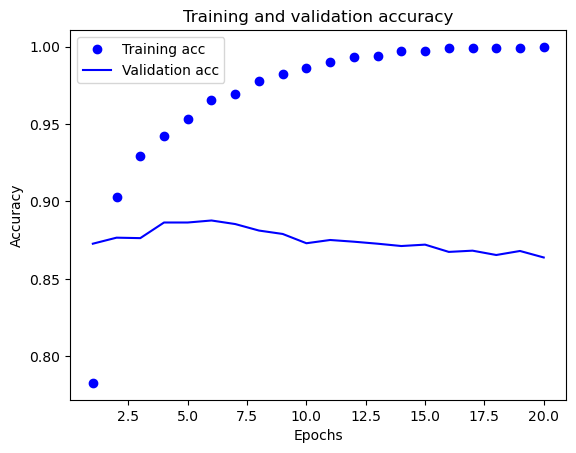

In [24]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.4534 - accuracy: 0.8134
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2565 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1971 - accuracy: 0.9286
Epoch 4/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1671 - accuracy: 0.9399


In [28]:
reults = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3107 - accuracy: 0.8786


In [29]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.24994765],
       [0.99949706],
       [0.9651527 ],
       ...,
       [0.16966489],
       [0.07612399],
       [0.7337121 ]], dtype=float32)